# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
#load URL for api and uits
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
#create emptiy list for weather 
temp = []
Humidity =[]
Cloudiness = []
winspeed = []
lat = []
lon = []
#create a loop to go thew len(cities)and query_url and json query for each city and append the empty list.
for city in range(len(cities)):
    query_url = f"{url}appid={api_key}&units={units}&q={cities[city]}"
    response = requests.get(query_url).json()
    try:
        
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        Humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        winspeed.append(response['wind']['speed'])
        Cloudiness.append(response['clouds']['all'])
        print(f"data recived #{city} now get to work :{cities[city]}")
    except KeyError:
        print("spooon")

data recived #0 now get to work :la asuncion
data recived #1 now get to work :adrar
data recived #2 now get to work :avarua
data recived #3 now get to work :rikitea
spooon
data recived #5 now get to work :shingu
data recived #6 now get to work :nanortalik
data recived #7 now get to work :san policarpo
data recived #8 now get to work :castro
data recived #9 now get to work :hilo
data recived #10 now get to work :hermanus
spooon
data recived #12 now get to work :gardez
data recived #13 now get to work :yulara
data recived #14 now get to work :mataura
data recived #15 now get to work :port blair
data recived #16 now get to work :okha
data recived #17 now get to work :sitka
data recived #18 now get to work :ushuaia
data recived #19 now get to work :carnarvon
data recived #20 now get to work :dar es salaam
data recived #21 now get to work :busselton
data recived #22 now get to work :georgetown
data recived #23 now get to work :murten
data recived #24 now get to work :kizukuri
data recived #

data recived #199 now get to work :pevek
data recived #200 now get to work :hermagor
spooon
data recived #202 now get to work :shimoda
data recived #203 now get to work :contamana
spooon
data recived #205 now get to work :beringovskiy
spooon
data recived #207 now get to work :berlevag
data recived #208 now get to work :sobolevo
data recived #209 now get to work :north myrtle beach
data recived #210 now get to work :clarence town
data recived #211 now get to work :yaan
data recived #212 now get to work :san jeronimo
spooon
data recived #214 now get to work :yumen
spooon
data recived #216 now get to work :amapa
data recived #217 now get to work :worland
data recived #218 now get to work :ahipara
spooon
data recived #220 now get to work :gazojak
data recived #221 now get to work :swan hill
data recived #222 now get to work :lompoc
spooon
data recived #224 now get to work :imbituba
data recived #225 now get to work :lazaro cardenas
data recived #226 now get to work :isangel
data recived #2

data recived #404 now get to work :meulaboh
data recived #405 now get to work :sistranda
spooon
spooon
data recived #408 now get to work :auki
data recived #409 now get to work :saint-augustin
data recived #410 now get to work :guararapes
data recived #411 now get to work :nishihara
data recived #412 now get to work :iqaluit
data recived #413 now get to work :murray
data recived #414 now get to work :fairmont
data recived #415 now get to work :jedburgh
data recived #416 now get to work :sorsk
data recived #417 now get to work :pitimbu
spooon
spooon
data recived #420 now get to work :kirensk
data recived #421 now get to work :bani walid
data recived #422 now get to work :athabasca
data recived #423 now get to work :ambulu
data recived #424 now get to work :rocha
data recived #425 now get to work :lavrentiya
data recived #426 now get to work :arman
data recived #427 now get to work :ixtapa
data recived #428 now get to work :antofagasta
data recived #429 now get to work :shwebo
data reciv

In [5]:
#will create a verable list with cities and emtpy lists and group them with colums in to a data frame 
weather_zip = list(zip(cities, lat,lon, temp,Humidity,winspeed,Cloudiness))
weather_coloms = ["city","lat","lon","temp max","Humidity","Wind Speed","Cloudiness"]
weather_df = pd.DataFrame(weather_zip, columns=weather_coloms)


weather_df.head()

,city,lat,lon,temp max,Humidity,Wind Speed,Cloudiness
0,la asuncion,-1.64,-78.74,47.45,79,7.07,99
1,adrar,27.87,-0.29,86.00,6,9.17,0
2,avarua,-21.21,-159.78,73.40,56,6.93,93
3,rikitea,-23.12,-134.97,75.41,85,20.60,100
4,belushya guba,33.72,135.99,78.80,69,12.75,75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

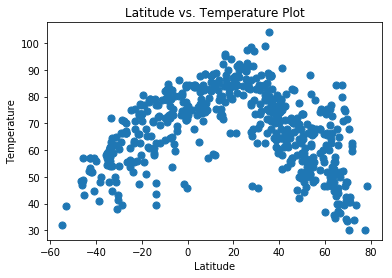

In [6]:


weather_df.plot.scatter(x="lat", y="temp max" ,s=50)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig('temperature.jpg')

#### Latitude vs. Humidity Plot

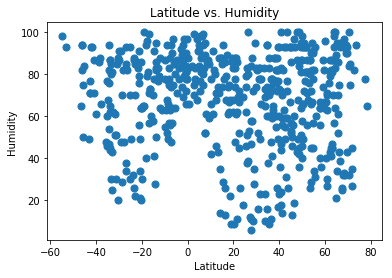

In [7]:
weather_df.plot.scatter(x="lat", y="Humidity" ,s=50)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('humidity.jpg')

#### Latitude vs. Cloudiness Plot

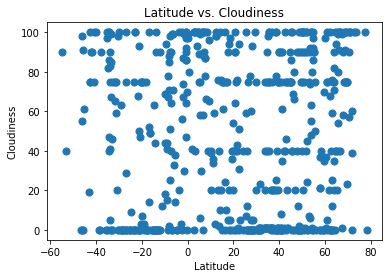

In [8]:
weather_df.plot.scatter(x="lat", y="Cloudiness" ,s=50)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig('cloudiness.jpg')

#### Latitude vs. Wind Speed Plot

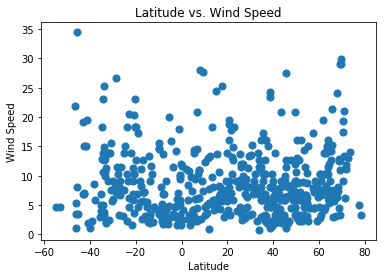

In [9]:
weather_df.plot.scatter(x="lat", y="Wind Speed" ,s=50)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig('windspeed.jpg')